In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.8MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D


In [21]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=20,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [22]:
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=20,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [23]:
def normalize(image,label):
  image=tf.cast(image/256. ,tf.float32)
  return image,label

In [24]:
train_ds= train_ds.map(normalize)
test_ds= test_ds.map(normalize)


In [28]:
model=Sequential([
    Conv2D(28,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Conv2D(78,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Conv2D(128,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu'),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 28)        │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 78)          │          19,734 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 78)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │          89,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169,575 (4.46 MB)

 Trainable params: 1,169,575 (4.46 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(train_ds,epochs=5,validation_data=test_ds)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - accuracy: 0.7439 - loss: 0.5167 - val_accuracy: 0.7830 - val_loss: 0.4596
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7907 - loss: 0.4452 - val_accuracy: 0.8104 - val_loss: 0.4140
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.8262 - loss: 0.3832 - val_accuracy: 0.8130 - val_loss: 0.4080
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8567 - loss: 0.3290 - val_accuracy: 0.8298 - val_loss: 0.4008
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.8866 - loss: 0.2603 - val_accuracy: 0.8058 - val_loss: 0.4787


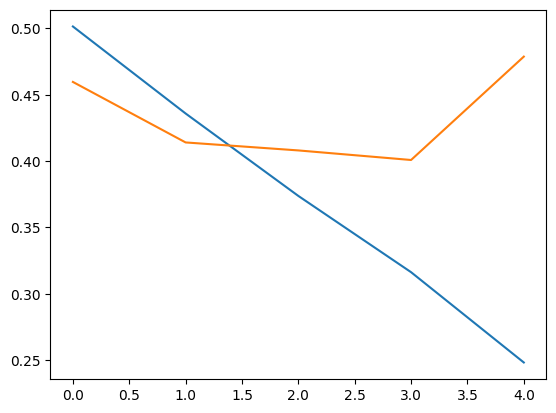

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


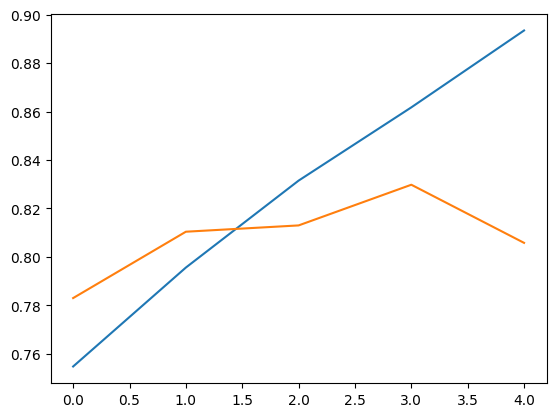

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [34]:
import cv2

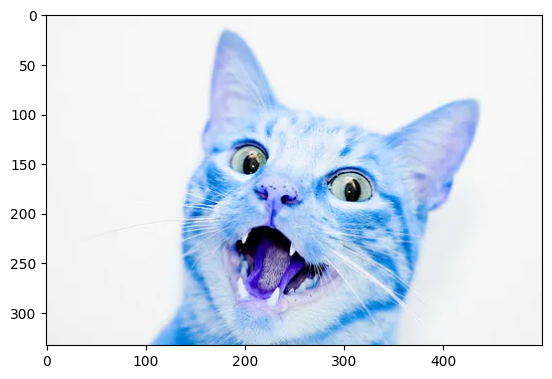

In [37]:
cat_image=cv2.imread('/content/cat-with-open-mouth.webp')
plt.imshow(cat_image)

In [38]:
cat_image=cv2.resize(cat_image,(256,256))

In [39]:
cat=cat_image.reshape(1,256,256,3)

In [40]:
cat

array([[[[245, 245, 245],
         [245, 245, 245],
         [245, 245, 245],
         ...,
         [246, 246, 246],
         [246, 246, 246],
         [246, 246, 246]],

        [[245, 245, 245],
         [245, 245, 245],
         [245, 245, 245],
         ...,
         [246, 246, 246],
         [246, 246, 246],
         [246, 246, 246]],

        [[245, 245, 245],
         [245, 245, 245],
         [245, 245, 245],
         ...,
         [246, 246, 246],
         [246, 246, 246],
         [246, 246, 246]],

        ...,

        [[239, 239, 239],
         [239, 239, 239],
         [239, 239, 239],
         ...,
         [242, 242, 242],
         [242, 242, 242],
         [242, 242, 242]],

        [[239, 239, 239],
         [239, 239, 239],
         [239, 239, 239],
         ...,
         [242, 242, 242],
         [242, 242, 242],
         [242, 242, 242]],

        [[239, 239, 239],
         [239, 239, 239],
         [239, 239, 239],
         ...,
         [242, 242, 242],
        

In [41]:
model.predict(cat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.00036927]], dtype=float32)

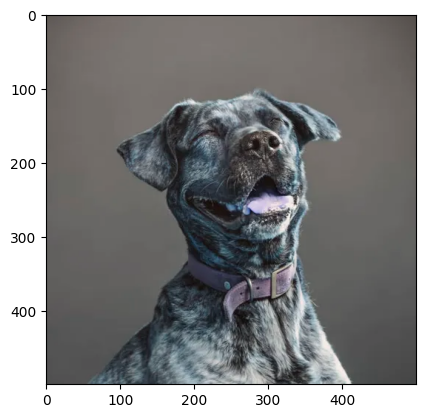

In [42]:
dog_image=cv2.imread('/content/dog-with-human-expression.webp')
plt.imshow(dog_image)

In [45]:
dog_image=cv2.resize(dog_image,(256,256))
dog=dog_image.reshape(1,256,256,3)

In [46]:
model.predict(dog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)